In [14]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import os
import xgboost as xgb
import datetime

from sklearn import preprocessing

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

from functions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
y, X, cf_X = reformat_data(10)

In [4]:
X

,Z,post,n.patients,V1_avg,V2_avg,V3_avg,V4_avg,V5_A_avg,V5_B_avg,V5_C_avg,X1,X3,X5,X6,X7,X8,X9,year_2,year_3,year_4,X2_B,X2_C,X4_B,X4_C
0,0,0,798,11.638039,3.016291,0.523810,-0.075418,0.810777,0.136591,0.052632,1,1,0,32.963107,3.765562,0.553537,-12.067845,0,0,0,0,1,0,0
1,0,0,745,11.628781,3.010738,0.540940,-0.063517,0.812081,0.135570,0.052349,1,1,0,32.963107,3.765562,0.553537,-12.067845,1,0,0,0,1,0,0
2,0,1,717,11.707139,3.002789,0.527197,-0.048665,0.814505,0.135286,0.050209,1,1,0,32.963107,3.765562,0.553537,-12.067845,0,1,0,0,1,0,0
3,0,1,749,11.608270,2.962617,0.526035,-0.031153,0.821095,0.126836,0.052069,1,1,0,32.963107,3.765562,0.553537,-12.067845,0,0,1,0,1,0,0
4,1,0,299,11.465109,3.096990,0.625418,0.348418,0.625418,0.230769,0.143813,0,1,0,27.128559,4.534485,0.220272,69.662199,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,335,11.433956,2.952239,0.602985,0.103649,0.794030,0.116418,0.089552,1,0,1,30.864148,10.445365,0.432808,44.177878,0,0,1,0,1,0,0
1996,1,0,455,11.687598,2.949451,0.487912,-0.270419,0.854945,0.085714,0.059341,0,1,1,25.040350,8.731508,0.404038,37.777060,0,0,0,0,1,0,0
1997,1,0,460,11.734272,2.995652,0.491304,-0.244746,0.852174,0.089130,0.058696,0,1,1,25.040350,8.731508,0.404038,37.777060,1,0,0,0,1,0,0
1998,1,1,485,11.772456,3.008247,0.488660,-0.260852,0.857732,0.082474,0.059794,0,1,1,25.040350,8.731508,0.404038,37.777060,0,1,0,0,1,0,0


In [5]:
patient_scalar_columns = ['V1_avg','V2_avg','V3_avg','V4_avg','V5_A_avg','V5_B_avg','V5_C_avg']
practice_scalar_columns = ['X6', 'X7', 'X8', 'X9']

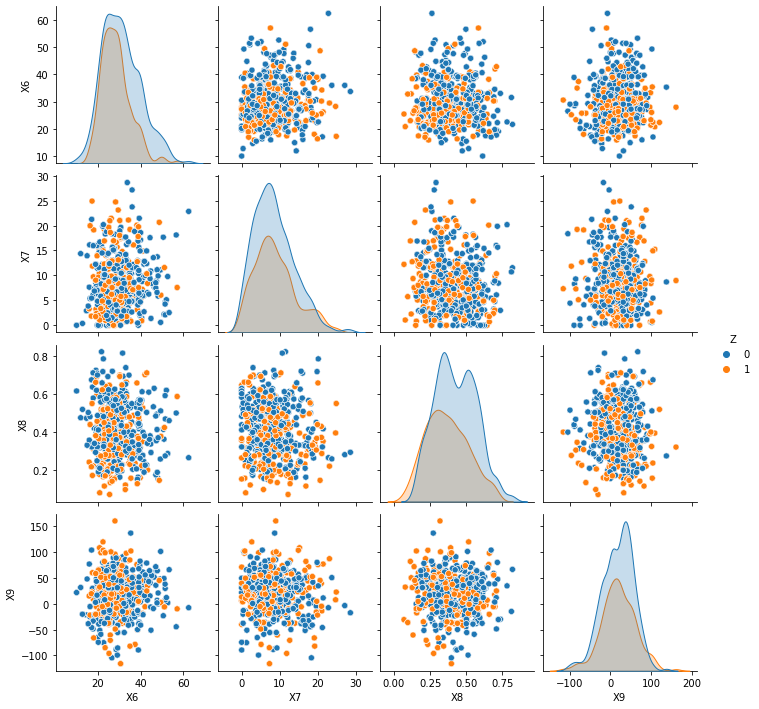

In [10]:
sns.pairplot(X[practice_scalar_columns + ["Z"]], hue="Z")

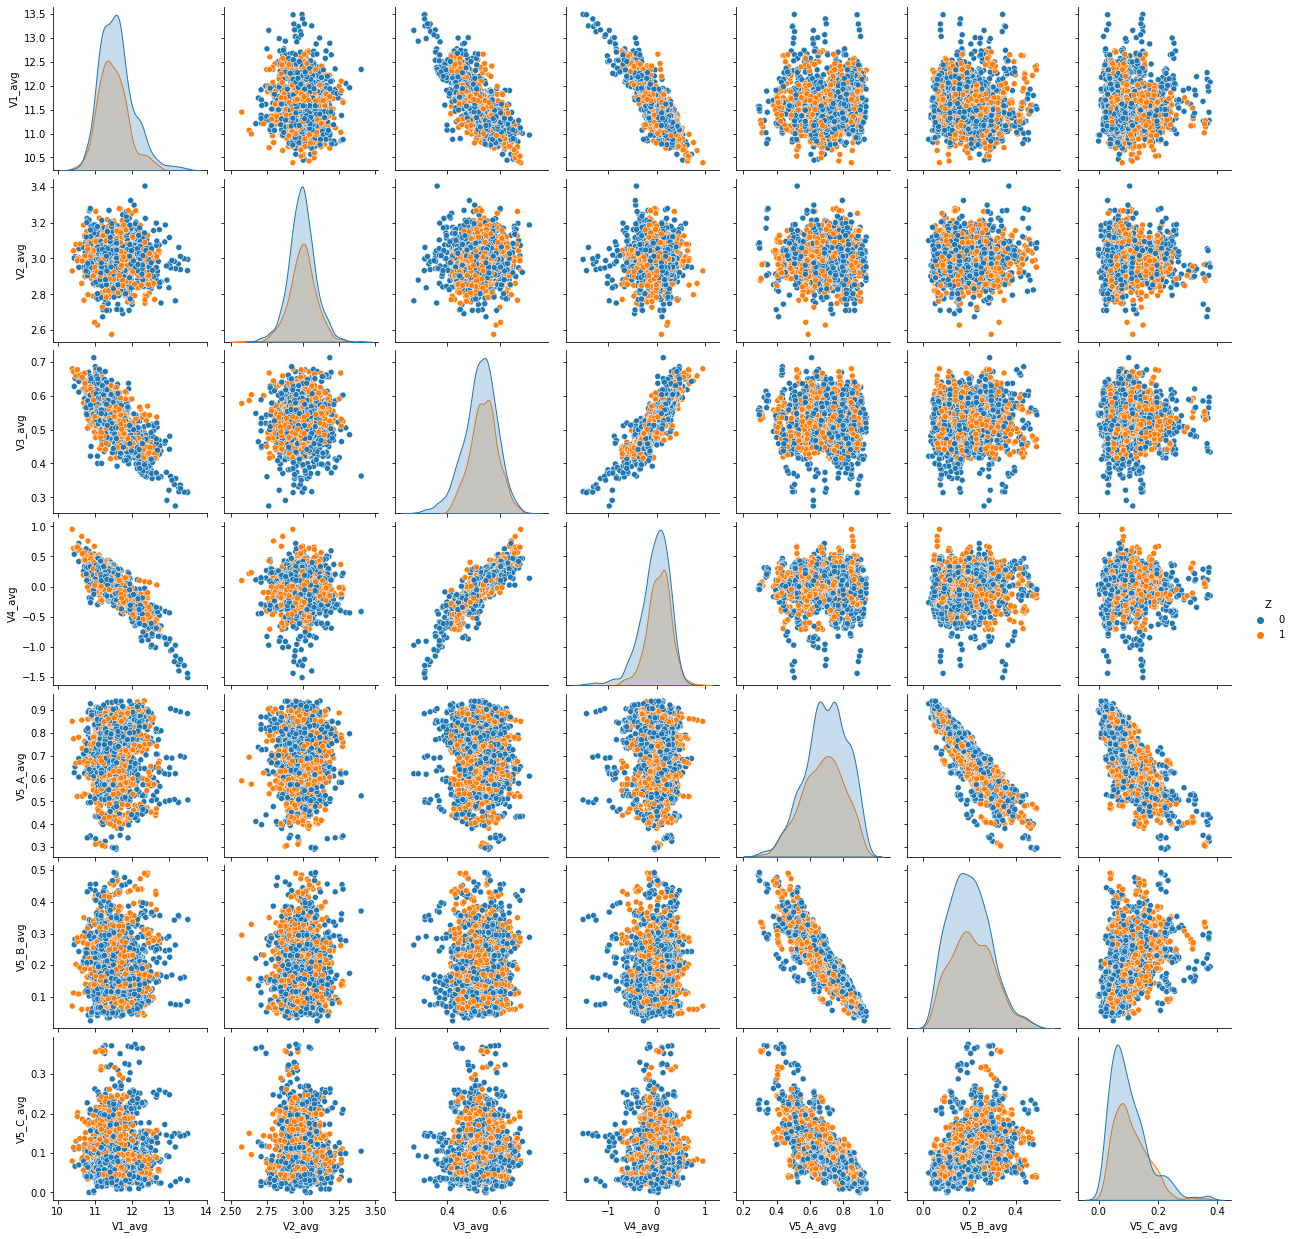

In [13]:
sns.pairplot(X[patient_scalar_columns + ["Z"]], hue="Z")

In [ ]:

for random_data in np.randomchoice(2000, 100):
    